# Generating Sentences from a Continuous Space
A VAE was trained on sentences and learned latent space was used to generate new sentences.  
Paper: https://arxiv.org/pdf/1511.06349.pdf  
Implementation: https://github.com/timbmg/Sentence-VAE

In [1]:
!pip install tensorboardx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 32.3 MB/s 


In [2]:
!git clone https://github.com/timbmg/Sentence-VAE.git

Cloning into 'Sentence-VAE'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.


Data: Tweets about Turkish telecommunications company Turkcell  

In [3]:
import pandas as pd

train = pd.read_excel('/content/data/train_tweets.xlsx')
test = pd.read_excel('/content/data/test_tweets.xlsx')

In [4]:
train = train.drop('Unnamed: 1', axis=1)
train = train.values.flatten().tolist()
train_ws = [' '+tweet+' ' for tweet in train] # Add whitespaces to both tips of tweets

test = test.drop('Unnamed: 1', axis=1)
test = test.values.flatten().tolist()
test_ws = [' '+tweet+' ' for tweet in test]

In [5]:
len(train_ws), len(test_ws)

(13832, 3457)

In [6]:
train_ws[:5]

[" Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkcell internet paketin bitti diye nasıl mesaj atabilir bana ya? Onu da mı ödeyelim ",
 ' 20 dk 1 GB internet 500 mb sadece kaşar turkcell de düşer. Oç çocukları. ',
 ' Ayrıca turkcell superonline reklamı kadar da kötü bir reklam görmemiştim ',
 ' Turkcell çok pahalı ya ',
 " Turkcell Kaş'ta internetin cekmiyor "]

In [7]:
with open('/content/data/ptb.valid.txt', 'w') as f:
    for item in test_ws:
        f.write("%s\n" % item)

with open('/content/data/ptb.train.txt', 'w') as f:
    for item in train_ws:
        f.write("%s\n" % item)

In [11]:
!python train.py -tb

SentenceVAE(
  (embedding): Embedding(11994, 300)
  (embedding_dropout): Dropout(p=0.5, inplace=False)
  (encoder_rnn): GRU(300, 256, batch_first=True)
  (decoder_rnn): GRU(300, 256, batch_first=True)
  (hidden2mean): Linear(in_features=256, out_features=16, bias=True)
  (hidden2logv): Linear(in_features=256, out_features=16, bias=True)
  (latent2hidden): Linear(in_features=16, out_features=256, bias=True)
  (outputs2vocab): Linear(in_features=256, out_features=11994, bias=True)
)
TRAIN Batch 0000/433, Loss  133.9894, NLL-Loss  133.9884, KL-Loss    0.4881, KL-Weight  0.002
TRAIN Batch 0050/433, Loss   99.2469, NLL-Loss   99.2133, KL-Loss   15.4327, KL-Weight  0.002
TRAIN Batch 0100/433, Loss   91.9177, NLL-Loss   91.8646, KL-Loss   21.4636, KL-Weight  0.002
TRAIN Batch 0150/433, Loss   82.5863, NLL-Loss   82.4879, KL-Loss   35.1253, KL-Weight  0.003
TRAIN Batch 0200/433, Loss   96.7401, NLL-Loss   96.5959, KL-Loss   45.4543, KL-Weight  0.003
TRAIN Batch 0250/433, Loss  101.4602, NLL-Lo

In [ ]:
#!tensorboard --logdir=logs

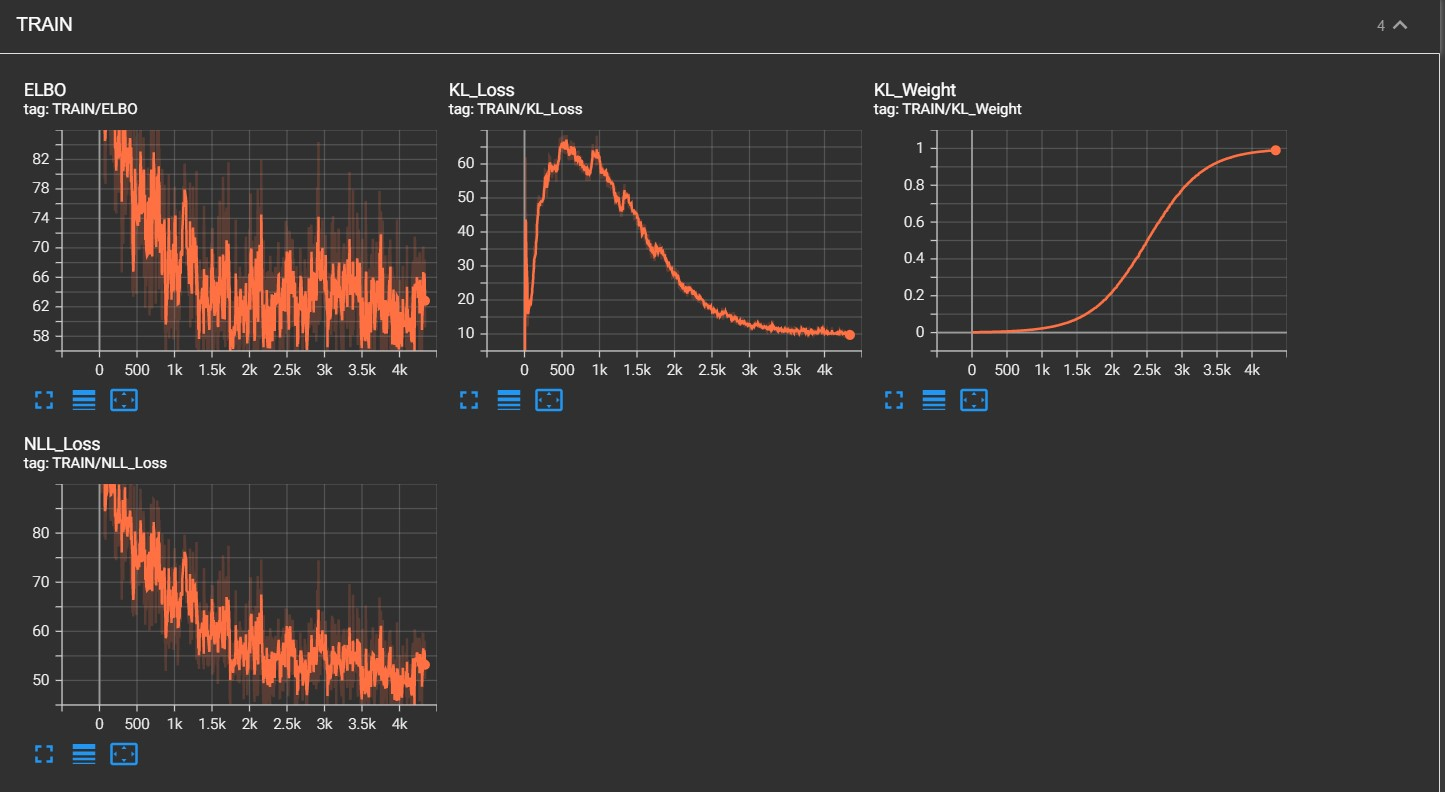

In [16]:
from IPython.display import Image
Image(filename='/content/figs/TS=2022-Jul-20-064630.jpg')

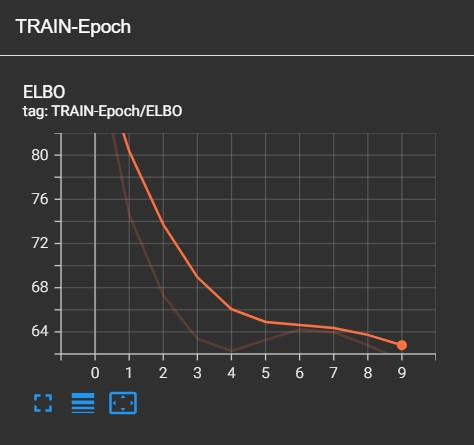

In [17]:
Image(filename='/content/figs/train-epoch_TS=2022-Jul-20-064630.jpg')

## Generating sentences and interpolating between

In [15]:
!python /content/inference.py -c '/content/bin/2022-Jul-20-06:46:30/E9.pytorch'

Model loaded from /content/bin/2022-Jul-20-06:46:30/E9.pytorch
----------SAMPLES----------
@turkcell @turkcellhizmet turkcell den <unk> <unk> ama siz siz siz siz siz siz siz siz siz siz siz siz siz siz siz siz siz siz <unk> <eos>
@turkcell @turkcellhizmet @tcellplatinum turkcell tv + aplikasyonundan life plus kanalında izleyebilirsiniz <unk> <eos>
turkcell müşteri hizmetleri temsilcilerinin nezaketi , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> , <unk> . <eos>
turkcell'in <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <eos>
turkcell de 4.5 g hızında ) ) ) ) ) ) ) ) gömülü resim için kalıcı bağlantı <eos>
turkcell beni sesimden tanır <unk> <unk> <unk> <eos>
turkcell superonline , vodafone ve vodafone da yaşanan sert tomb